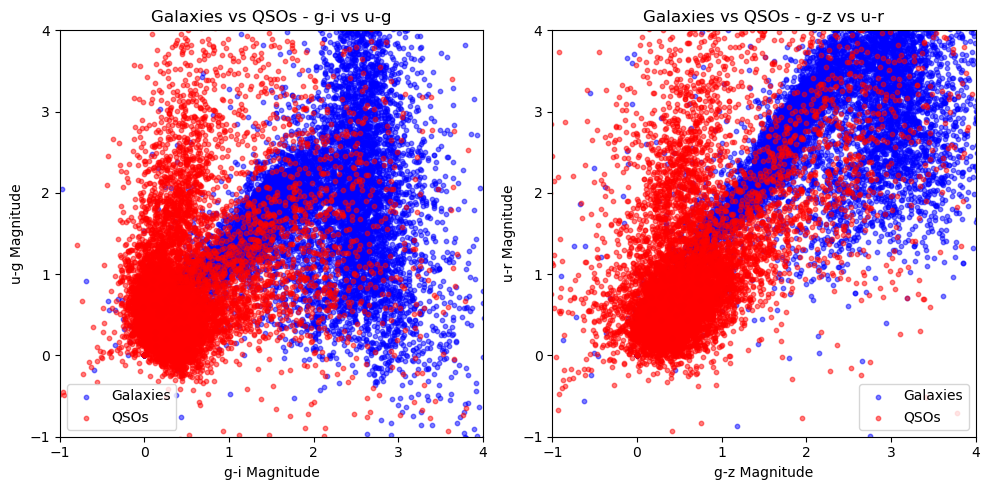

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load photometric dataset for galaxies
galaxy_data = np.genfromtxt(r'C:\Users\jprad\Downloads\photometric-data_03-29-2024_photoMetricData_combined_photometric_data_GALAXY.csv', delimiter=',', skip_header=1)

# Load photometric dataset for QSOs
qso_data = np.genfromtxt(r'C:\Users\jprad\Downloads\photometric-data_03-29-2024_photoMetricData_combined_photometric_data_QSO.csv', delimiter=',', skip_header=1)

# Sample 1000 points from each class
galaxy_sample = galaxy_data[:10000]
qso_sample = qso_data[:10000]

# Define color indices for galaxies and QSOs
galaxy_color_indices = {
    'u-g': galaxy_sample[:, 5] - galaxy_sample[:, 6],  # u-g index
    'u-r': galaxy_sample[:, 5] - galaxy_sample[:, 7],  # u-r index
    'u-i': galaxy_sample[:, 5] - galaxy_sample[:, 8],  # u-i index
    'u-z': galaxy_sample[:, 5] - galaxy_sample[:, 9],  # u-z index
    'g-r': galaxy_sample[:, 6] - galaxy_sample[:, 7],  # g-r index
    'g-i': galaxy_sample[:, 6] - galaxy_sample[:, 8],  # g-i index
    'g-z': galaxy_sample[:, 6] - galaxy_sample[:, 9],  # g-z index
    'r-i': galaxy_sample[:, 7] - galaxy_sample[:, 8],  # r-i index
    'r-z': galaxy_sample[:, 7] - galaxy_sample[:, 9],  # r-z index
}

qso_color_indices = {
    'u-g': qso_sample[:, 5] - qso_sample[:, 6],  # u-g index
    'u-r': qso_sample[:, 5] - qso_sample[:, 7],  # u-r index
    'u-i': qso_sample[:, 5] - qso_sample[:, 8],  # u-i index
    'u-z': qso_sample[:, 5] - qso_sample[:, 9],  # u-z index
    'g-r': qso_sample[:, 6] - qso_sample[:, 7],  # g-r index
    'g-i': qso_sample[:, 6] - qso_sample[:, 8],  # g-i index
    'g-z': qso_sample[:, 6] - qso_sample[:, 9],  # g-z index
    'r-i': qso_sample[:, 7] - qso_sample[:, 8],  # r-i index
    'r-z': qso_sample[:, 7] - qso_sample[:, 9],  # r-z index
}

# Plot color-color diagrams for galaxies and QSOs
plt.figure(figsize=(10, 5))

# Plot g-i vs u-g
plt.subplot(1, 2, 1)
plt.scatter(galaxy_color_indices['g-i'], galaxy_color_indices['u-g'], s=10, c='blue', alpha=0.5, label='Galaxies')
plt.scatter(qso_color_indices['g-i'], qso_color_indices['u-g'], s=10, c='red', alpha=0.5, label='QSOs')
plt.xlabel('g-i Magnitude')
plt.ylabel('u-g Magnitude')
plt.title('Galaxies vs QSOs - g-i vs u-g')
plt.xticks(np.arange(-1, 5, 1))
plt.yticks(np.arange(-1, 5, 1))
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.legend()

# Plot g-z vs u-r
plt.subplot(1, 2, 2)
plt.scatter(galaxy_color_indices['g-z'], galaxy_color_indices['u-r'], s=10, c='blue', alpha=0.5, label='Galaxies')
plt.scatter(qso_color_indices['g-z'], qso_color_indices['u-r'], s=10, c='red', alpha=0.5, label='QSOs')
plt.xlabel('g-z Magnitude')
plt.ylabel('u-r Magnitude')
plt.title('Galaxies vs QSOs - g-z vs u-r')
plt.xticks(np.arange(-1, 5, 1))
plt.yticks(np.arange(-1, 5, 1))
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Load photometric dataset for galaxies
galaxy_data = np.genfromtxt(r'C:\Users\jprad\Downloads\photometric-data_03-29-2024_photoMetricData_combined_photometric_data_GALAXY.csv', delimiter=',', skip_header=1)

# Load photometric dataset for QSOs
qso_data = np.genfromtxt(r'C:\Users\jprad\Downloads\photometric-data_03-29-2024_photoMetricData_combined_photometric_data_QSO.csv', delimiter=',', skip_header=1)

# Sample 5000 points from each class
galaxy_sample = galaxy_data[:10000]
qso_sample = qso_data[:10000]

# Define target variable
galaxy_labels = np.zeros(len(galaxy_sample))
qso_labels = np.ones(len(qso_sample))

# Combine data and labels
X = np.vstack((galaxy_sample, qso_sample))
y = np.concatenate((galaxy_labels, qso_labels))

# Get the column names (indices names)
column_names = ['u-g', 'u-r', 'u-i', 'u-z', 'g-r', 'g-i', 'g-z', 'r-i', 'r-z']

# Create a dictionary to store accuracies for each color index
accuracies = {}

# Lists to store evaluation metrics for all color indices
all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
all_confusion_matrices = []

# Loop over each color index
for index, col_name in enumerate(column_names):
    # Extract the column for the current color index
    X_col = X[:, index].reshape(-1, 1)
    
    # Replace NaN values with the mean of the column
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X_col)
    
    # Check if the number of features after imputation is greater than 0
    if X_imputed.shape[1] > 0:
        # Split imputed data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

        # Train Random Forest with GridSearchCV
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }

        rf_model = RandomForestClassifier(random_state=42)
        grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Get best model
        best_rf_model = grid_search.best_estimator_

        # Evaluate best model
        y_pred = best_rf_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store accuracy for the current color index
        accuracies[col_name] = accuracy

        # Store evaluation metrics for all color indices
        all_accuracies.append(accuracy)
        all_precisions.append(precision_score(y_test, y_pred))
        all_recalls.append(recall_score(y_test, y_pred))
        all_f1_scores.append(f1_score(y_test, y_pred))
        all_confusion_matrices.append(confusion_matrix(y_test, y_pred))
        
        # Calculate the accuracy of galaxies and QSOs separately
        galaxy_accuracy = accuracy_score(y_test[y_test == 0], y_pred[y_test == 0])
        qso_accuracy = accuracy_score(y_test[y_test == 1], y_pred[y_test == 1])

        # Print the accuracies of galaxies and QSOs separately
        print(f"Accuracy for galaxies: {galaxy_accuracy:.2f}")
        print(f"Accuracy for QSOs: {qso_accuracy:.2f}")

    else:
        print(f"No features left after imputation for color index: {col_name}")

# Print accuracies for each color index
for index_name, accuracy in accuracies.items():
    print(f"Accuracy for {index_name}: {accuracy:.2f}")

# Print overall evaluation metrics
print("Overall Evaluation Metrics:")
print(f"Accuracy: {np.mean(all_accuracies):.4f}")
print(f"Precision: {np.mean(all_precisions):.4f}")
print(f"Recall: {np.mean(all_recalls):.4f}")
print(f"F1-score: {np.mean(all_f1_scores):.4f}")
print("Confusion Matrix:")
print(np.sum(all_confusion_matrices, axis=0))


Accuracy for galaxies: 1.00
Accuracy for QSOs: 0.23
Accuracy for galaxies: 0.92
Accuracy for QSOs: 0.75
No features left after imputation for color index: u-i
Accuracy for galaxies: 0.98
Accuracy for QSOs: 0.55
Accuracy for galaxies: 0.89
Accuracy for QSOs: 0.78
Accuracy for galaxies: 0.71
Accuracy for QSOs: 0.55
Accuracy for galaxies: 0.61
Accuracy for QSOs: 0.83
Accuracy for galaxies: 0.50
Accuracy for QSOs: 0.88
Accuracy for galaxies: 0.81
Accuracy for QSOs: 0.70
Accuracy for u-g: 0.62
Accuracy for u-r: 0.84
Accuracy for u-z: 0.77
Accuracy for g-r: 0.84
Accuracy for g-i: 0.63
Accuracy for g-z: 0.71
Accuracy for r-i: 0.69
Accuracy for r-z: 0.75
Overall Evaluation Metrics:
Accuracy: 0.7307
Precision: 0.8089
Recall: 0.6588
F1-score: 0.6911
Confusion Matrix:
[[12940  3212]
 [ 5407 10441]]
